<a href="https://colab.research.google.com/github/preetmodi/Credit-Risk-Analytics/blob/main/Data_Cleaning_P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Drive

In [1]:
!sudo echo -ne '\n' | sudo add-apt-repository ppa:alessandro-strada/ppa >/dev/null 2>&1 # note: >/dev/null 2>&1 is used to supress printing
!sudo apt update >/dev/null 2>&1
!sudo apt install google-drive-ocamlfuse >/dev/null 2>&1
!google-drive-ocamlfuse
!sudo apt-get install w3m >/dev/null 2>&1 # to act as web browser 
!xdg-settings set default-web-browser w3m.desktop >/dev/null 2>&1 # to set default browser 
%cd /content
!mkdir gdrive
%cd gdrive
!mkdir "My Drive"
!google-drive-ocamlfuse "/content/gdrive/My Drive"

/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.com%2Foauth2callback&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force&state=HpwA5CaaGmxgv9F0MaFIEQP3FQNEgZrpJWN8yOQfwcM'
/bin/sh: 1: firefox: not found
/bin/sh: 1: google-chrome: not found
/bin/sh: 1: chromium-browser: not found
/bin/sh: 1: open: not found
Cannot retrieve auth tokens.
Failure("Error opening URL:https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.com%2Foauth2callback&scope=https%3A%2F%2Fwww.

# Unzip files

In [2]:
# %cd /content/gdrive/My Drive/Data/

In [3]:
# !unzip "LCOrigination Data.zip"

# Data Exploration

In [4]:
%cd /content/gdrive/My Drive/Data/

/content/gdrive/My Drive/Data


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [6]:
!ls

 LCDataDictionaryClean.xlsx   LCOrigination.csv  'LCOrigination Data.zip'


In [7]:
df = pd.read_csv("LCOrigination.csv", low_memory=False)

In [8]:
df.iloc[:,-10:]

,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1280641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1280642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1280643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1280644,NaN,NaN,NaN,NaN,NaN,ACTIVE,Mar-2019,10000.0,44.82,1.0


In [9]:
df.columns.to_list().index('collection_recovery_fee')

39

In [10]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,1.280615e+06,1.280615e+06,1.280615e+06,1.280615e+06,1.280615e+06,1.280615e+06,1.279707e+06,1.280615e+06,1.280615e+06,1.280615e+06,...,8610.0,8610.000000,8610.0,8610.000000,6432.000000,8610.000000,8610.000000,34214.000000,34214.000000,34214.000000
mean,1.513560e+04,1.513023e+04,1.511406e+04,1.340095e+01,4.488773e+02,7.715590e+04,1.898675e+01,3.123031e-01,6.973707e+02,7.013708e+02,...,3.0,159.393786,3.0,14.445296,467.320499,11812.129483,197.559281,5011.163605,47.773142,13.196031
std,9.164207e+03,9.162097e+03,9.163897e+03,4.923413e+00,2.672979e+02,7.592994e+04,1.399290e+01,8.765886e-01,3.246384e+01,3.246464e+01,...,0.0,132.041083,0.0,9.440823,384.066227,7668.925156,199.297305,3691.736410,7.304390,8.159966
min,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.250000e+02,6.290000e+02,...,3.0,1.470000,3.0,0.000000,4.410000,174.150000,0.010000,44.210000,0.200000,0.000000
25%,8.000000e+03,8.000000e+03,8.000000e+03,9.930000e+00,2.552500e+02,4.550000e+04,1.206000e+01,0.000000e+00,6.700000e+02,6.740000e+02,...,3.0,61.402500,3.0,7.000000,180.592500,5736.040000,48.102500,2208.370000,45.000000,6.000000
50%,1.300000e+04,1.300000e+04,1.300000e+04,1.279000e+01,3.816400e+02,6.500000e+04,1.805000e+01,0.000000e+00,6.900000e+02,6.940000e+02,...,3.0,122.420000,3.0,16.000000,362.700000,10211.385000,136.885000,4147.000000,45.000000,14.000000
75%,2.000000e+04,2.000000e+04,2.000000e+04,1.614000e+01,5.953100e+02,9.200000e+04,2.472000e+01,0.000000e+00,7.150000e+02,7.190000e+02,...,3.0,220.037500,3.0,23.000000,642.285000,16410.052500,287.407500,6851.195000,50.000000,18.000000
max,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.099920e+07,9.990000e+02,5.800000e+01,8.450000e+02,8.500000e+02,...,3.0,943.940000,3.0,32.000000,2680.890000,38399.000000,1407.860000,33601.000000,521.350000,181.000000


# Open Metadata FIle

In [11]:
columns = pd.read_excel("LCDataDictionaryClean.xlsx")['Variable'].to_list()
columns

['id',
 'AmountRequested',
 'loan_amnt',
 'term',
 'ApplicationDate',
 'Risk_Score',
 'ficoRangeHigh',
 'ficoRangeLow',
 'acc_open_past_24mths',
 'addr_state',
 'all_util',
 'annual_inc',
 'annual_inc_joint',
 'application_type',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_2yrs',
 'desc',
 'dti',
 'dti_joint',
 'earliest_cr_line',
 'emp_length',
 'emp_title',
 'fico_range_high',
 'fico_range_low',
 'funded_amnt',
 'funded_amnt_inv',
 'home_ownership',
 'il_util',
 'inq_fi',
 'inq_last_12m',
 'inq_last_6mths',
 'max_bal_bc',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_last_record',
 'mths_since_rcnt_il',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_

['id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'installment',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 '

89

# Performance DF 

In [15]:
perfromance_columns = df.drop(columns = total_columns).columns.to_list()

In [16]:
perfromance_columns_orig = pd.read_excel("LCDataDictionaryClean.xlsx", sheet_name="Performance")['Variable'].to_list()
sum([1 for column in perfromance_columns if column in perfromance_columns_orig])


39

In [17]:
origination_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280646 entries, 0 to 1280645
Data columns (total 90 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   id                                   1280646 non-null  object 
 1   loan_amnt                            1280615 non-null  float64
 2   funded_amnt                          1280615 non-null  float64
 3   funded_amnt_inv                      1280615 non-null  float64
 4   term                                 1280615 non-null  object 
 5   installment                          1280615 non-null  float64
 6   emp_title                            1184469 non-null  object 
 7   emp_length                           1195251 non-null  object 
 8   home_ownership                       1280615 non-null  object 
 9   annual_inc                           1280615 non-null  float64
 10  desc                                 71148 non-null    object 
 11

#Origination DF

In [ ]:
total_columns = [column for column in df.columns.to_list() if column in columns]
total_columns

In [ ]:
len(total_columns)

In [ ]:
df['Default'] = df['loan_status'].apply(lambda x: 1 if x == 'Default' or x=='Charged Off' else 0)
origination_df = df[total_columns+['Default']]

In [18]:
origination_df.isnull().sum()

id                                           0
loan_amnt                                   31
funded_amnt                                 31
funded_amnt_inv                             31
term                                        31
                                        ...   
sec_app_num_rev_accts                  1222471
sec_app_chargeoff_within_12_mths       1222471
sec_app_collections_12_mths_ex_med     1222471
sec_app_mths_since_last_major_derog    1260860
Default                                      0
Length: 90, dtype: int64

In [19]:
null_columns = origination_df.columns[origination_df.isnull().any()]
null = origination_df[null_columns[60:]].isnull().sum()


In [20]:
null[null>31].value_counts()

38815      9
1222471    8
31968      2
27008      2
38910      1
41444      1
435        1
46         1
1222472    1
1223480    1
1260860    1
dtype: int64

In [21]:
null

num_actv_bc_tl                           38815
num_actv_rev_tl                          38815
num_bc_sats                              31968
num_bc_tl                                38815
num_il_tl                                38815
num_op_rev_tl                            38815
num_rev_accts                            38815
num_rev_tl_bal_gt_0                      38815
num_sats                                 31968
pct_tl_nvr_dlq                           38910
percent_bc_gt_75                         41444
pub_rec_bankruptcies                       435
tax_liens                                   46
tot_hi_cred_lim                          38815
total_bal_ex_mort                        27008
total_bc_limit                           27008
total_il_high_credit_limit               38815
revol_bal_joint                        1222472
sec_app_earliest_cr_line               1222471
sec_app_inq_last_6mths                 1222471
sec_app_mort_acc                       1222471
sec_app_open_

In [22]:
last_30_df = origination_df[null.index[:17]].dropna()

In [23]:
last_30_df.describe()

,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,1.227471e+06,1.227471e+06,1.227471e+06,1.227471e+06,1.227471e+06,1.227471e+06,1.227471e+06,1.227471e+06,1.227471e+06,1.227471e+06,1.227471e+06,1.227471e+06,1.227471e+06,1.227471e+06,1.227471e+06,1.227471e+06,1.227471e+06
mean,3.736330e+00,5.722855e+00,4.834422e+00,7.801544e+00,8.426934e+00,8.340940e+00,1.411711e+01,5.668137e+00,1.172100e+01,9.412481e+01,4.313869e+01,1.338948e-01,5.008021e-02,1.751037e+05,5.113385e+04,2.298842e+04,4.361290e+04
std,2.310813e+00,3.398898e+00,3.016367e+00,4.696794e+00,7.385587e+00,4.681380e+00,8.058384e+00,3.307889e+00,5.648386e+00,8.979239e+00,3.626208e+01,3.730300e-01,3.906484e-01,1.793007e+05,4.969130e+04,2.260965e+04,4.480648e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+02,0.000000e+00,1.000000e+02,0.000000e+00
25%,2.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,5.000000e+00,8.000000e+00,3.000000e+00,8.000000e+00,9.130000e+01,0.000000e+00,0.000000e+00,0.000000e+00,5.009600e+04,2.111800e+04,8.300000e+03,1.500000e+04
50%,3.000000e+00,5.000000e+00,4.000000e+00,7.000000e+00,6.000000e+00,7.000000e+00,1.300000e+01,5.000000e+00,1.100000e+01,1.000000e+02,4.000000e+01,0.000000e+00,0.000000e+00,1.107000e+05,3.805300e+04,1.610000e+04,3.264600e+04
75%,5.000000e+00,7.000000e+00,6.000000e+00,1.000000e+01,1.100000e+01,1.100000e+01,1.800000e+01,7.000000e+00,1.500000e+01,1.000000e+02,7.500000e+01,0.000000e+00,0.000000e+00,2.527955e+05,6.448100e+04,2.990000e+04,5.860700e+04
max,4.500000e+01,5.400000e+01,7.100000e+01,8.500000e+01,1.590000e+02,9.100000e+01,1.280000e+02,5.500000e+01,9.700000e+01,1.000000e+02,1.000000e+02,1.100000e+01,8.500000e+01,9.999999e+06,2.921551e+06,8.343000e+05,2.118996e+06


In [24]:
print(origination_df['num_bc_tl'].value_counts()[0])

3285


In [25]:
origination_df[null.index[:17]].describe()

,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,1.241831e+06,1.241831e+06,1.248678e+06,1.241831e+06,1.241831e+06,1.241831e+06,1.241831e+06,1.241831e+06,1.248678e+06,1.241736e+06,1.239202e+06,1.280211e+06,1.280600e+06,1.241831e+06,1.253638e+06,1.253638e+06,1.241831e+06
mean,3.693404e+00,5.682561e+00,4.779420e+00,7.744212e+00,8.438429e+00,8.284069e+00,1.405786e+01,5.628511e+00,1.166138e+01,9.408449e+01,4.322875e+01,1.309550e-01,4.847025e-02,1.747688e+05,5.088235e+04,2.268758e+04,4.358568e+04
std,2.331715e+00,3.404771e+00,3.038750e+00,4.710918e+00,7.393168e+00,4.690573e+00,8.055113e+00,3.314242e+00,5.648912e+00,9.025152e+00,3.626004e+01,3.691172e-01,3.841387e-01,1.792884e+05,4.953242e+04,2.257831e+04,4.476672e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,5.000000e+00,8.000000e+00,3.000000e+00,8.000000e+00,9.130000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.993000e+04,2.096200e+04,8.100000e+03,1.500000e+04
50%,3.000000e+00,5.000000e+00,4.000000e+00,7.000000e+00,6.000000e+00,7.000000e+00,1.200000e+01,5.000000e+00,1.100000e+01,1.000000e+02,4.000000e+01,0.000000e+00,0.000000e+00,1.104910e+05,3.784500e+04,1.590000e+04,3.262600e+04
75%,5.000000e+00,7.000000e+00,6.000000e+00,1.000000e+01,1.100000e+01,1.100000e+01,1.800000e+01,7.000000e+00,1.400000e+01,1.000000e+02,7.500000e+01,0.000000e+00,0.000000e+00,2.523105e+05,6.419100e+04,2.960000e+04,5.856900e+04
max,4.500000e+01,5.400000e+01,7.100000e+01,8.500000e+01,1.590000e+02,9.100000e+01,1.280000e+02,5.500000e+01,9.700000e+01,1.000000e+02,1.000000e+02,1.100000e+01,8.500000e+01,9.999999e+06,2.921551e+06,8.343000e+05,2.118996e+06


In [26]:
origination_df[origination_df['application_type']=='Joint App']['dti_joint'] # 'annual_inc_joint']].value_counts()

1          13.85
101        16.40
254        15.40
307        22.76
386        17.07
           ...  
1280497    20.52
1280572    15.30
1280600     9.36
1280622    19.13
1280632    11.09
Name: dti_joint, Length: 65496, dtype: float64

In [27]:
# origination_df['pub_rec'].value_counts(dropna=False)
origination_df['mths_since_recent_bc_dlq'].isnull().sum()
# origination_df['emp_title'].dropna()[origination_df['emp_title'].dropna().str.startswith("")]

982792

In [28]:
origination_df['emp_length'].value_counts(dropna=False)[np.nan]

85395

In [29]:
# origination_df.columns[origination_df.columns.str.contains("emp")]
origination_df[origination_df['emp_length'].isnull()]['emp_title'].value_counts(dropna=False)

NaN                     84920
Owner                      15
Driver                      7
owner                       6
Teacher                     5
                        ...  
Owner/Operator              1
Nanny                       1
Sales representative        1
GS9                         1
Finance                     1
Name: emp_title, Length: 398, dtype: int64

In [30]:
origination_df['emp_length']

0          10+ years
1          10+ years
2          10+ years
3          10+ years
4            6 years
             ...    
1280641      4 years
1280642      7 years
1280643    10+ years
1280644      6 years
1280645    10+ years
Name: emp_length, Length: 1280646, dtype: object

In [31]:
origination_df['mths_since_recent_bc_dlq'].value_counts()

26.0     4642
44.0     4554
22.0     4543
24.0     4529
25.0     4522
         ... 
174.0       1
138.0       1
153.0       1
154.0       1
202.0       1
Name: mths_since_recent_bc_dlq, Length: 167, dtype: int64

In [32]:
origination_df['open_acc_6m'][origination_df['mths_since_rcnt_il'].isnull()].value_counts(dropna=False)

NaN    507026
0.0     14210
1.0      6664
2.0      2388
3.0       838
4.0       260
5.0       105
6.0        28
7.0        13
9.0         4
8.0         4
Name: open_acc_6m, dtype: int64

In [33]:
origination_df['mo_sin_old_rev_tl_op'].dropna()

0          192.0
1          184.0
2           55.0
3          253.0
4          248.0
           ...  
1280641    187.0
1280642     88.0
1280643    307.0
1280644    206.0
1280645    243.0
Name: mo_sin_old_rev_tl_op, Length: 1241830, dtype: float64

In [34]:
origination_df['percent_bc_gt_75'].value_counts(dropna=False)

0.0      329257
100.0    216897
50.0     132255
33.3      83205
66.7      77645
          ...  
8.8           1
36.7          1
3.0           1
88.0          1
60.9          1
Name: percent_bc_gt_75, Length: 260, dtype: int64

In [35]:
origination_df[origination_df['application_type']=='Joint App']['sec_app_mort_acc'].value_counts(dropna=False).sum()

65496

In [36]:
len(origination_df) - 1260860 #58175

19786

In [37]:
origination_df['sec_app_mths_since_last_major_derog']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
1280641   NaN
1280642   NaN
1280643   NaN
1280644   NaN
1280645   NaN
Name: sec_app_mths_since_last_major_derog, Length: 1280646, dtype: float64

#Transformation First 30

In [135]:
transformed_data = origination_df.copy()

### Generate Coborrower income column and delete annual_inc_joint column

In [136]:
transformed_data['coborrower_inc'] = (origination_df['annual_inc_joint'] - origination_df['annual_inc']).fillna(0)
drop_columns = ['annual_inc_joint']

In [137]:
transformed_data['dti_joint'] = origination_df['dti_joint'].fillna(0)

In [138]:
drop_columns.append('mths_since_last_record')


In [139]:
drop_columns+=['emp_length', 'emp_title']

In [140]:
drop_columns+=['desc']

In [141]:
transformed_data['bank_dlq'] = np.where(origination_df['mths_since_recent_bc_dlq'].isnull(), 0, 1)
drop_columns+=['mths_since_recent_bc_dlq']

# Transformation Mid 30

In [142]:
transformed_data['il_acc'] = np.where(origination_df['mths_since_rcnt_il'].isnull(), 0, 1)
drop_columns += ['mths_since_rcnt_il']

In [143]:
transformed_data['total_bal_il'] = origination_df['total_bal_il'].fillna(0)

In [144]:
drop_columns

['annual_inc_joint',
 'mths_since_last_record',
 'emp_length',
 'emp_title',
 'desc',
 'mths_since_recent_bc_dlq',
 'mths_since_rcnt_il']

In [145]:
origination_df['il_util'].value_counts(dropna=False)

NaN      618602
81.0      12721
78.0      12655
75.0      12471
83.0      12458
          ...  
234.0         1
228.0         1
195.0         1
369.0         1
246.0         1
Name: il_util, Length: 261, dtype: int64

In [146]:
transformed_data['il_util'] = origination_df['il_util'].fillna(0) # Replacing nan with 0 might coincide with the people who have paid up their loans and have 0 balance. Hence, 0 il_util

In [147]:
drop_columns+=['open_il_12m', 'all_util', 'chargeoff_within_12_mths', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl']
origination_df[['open_il_12m', 'all_util', 'chargeoff_within_12_mths', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl']]

,open_il_12m,all_util,chargeoff_within_12_mths,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl
0,0.0,29.0,0.0,113.0,192.0,2.0,2.0
1,0.0,65.0,0.0,125.0,184.0,14.0,14.0
2,0.0,55.0,0.0,149.0,55.0,32.0,13.0
3,2.0,49.0,0.0,155.0,253.0,15.0,10.0
4,0.0,54.0,0.0,150.0,248.0,1.0,1.0
...,...,...,...,...,...,...,...
1280641,0.0,24.0,0.0,44.0,187.0,0.0,0.0
1280642,1.0,103.0,0.0,201.0,88.0,3.0,3.0
1280643,0.0,59.0,0.0,166.0,307.0,15.0,15.0
1280644,0.0,73.0,0.0,132.0,206.0,9.0,9.0


In [148]:
df.columns[df.columns.str.contains("charge")]

Index(['chargeoff_within_12_mths', 'sec_app_chargeoff_within_12_mths'], dtype='object')

In [149]:
drop_columns+=['revol_bal_joint', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog']

In [150]:
# len(drop_columns)
skeptical_columns = ['open_acc_6m', 'open_act_il', 'open_il_24m', 'open_il_12m', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'mths_since_recent_revol_delinq', 'total_cu_tl', 'inq_last_12m', 'inq_fi']

In [154]:
transformed_data['mths_since_recent_inq'][transformed_data['mths_since_recent_inq'] == 0] = 0.5
transformed_data['mths_since_recent_inq'] = 1/transformed_data['mths_since_recent_inq']
transformed_data['mths_since_recent_inq'] = transformed_data['mths_since_recent_inq'].fillna(0)

<ipython-input-154-e79f2644c5ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transformed_data['mths_since_recent_inq'][transformed_data['mths_since_recent_inq'] == 0] = 0.5


In [156]:
# transformed_data[skeptical_columns]
# transformed_data['dti_joint'] = origination_df['dti_joint']
transformed_data = transformed_data.drop(columns = skeptical_columns+drop_columns).dropna() #isna().sum().to_dict()

In [157]:
transformed_data

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,home_ownership,annual_inc,purpose,title,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,Default,coborrower_inc,bank_dlq,il_acc
0,68355089,24700.0,24700.0,24700.0,36 months,820.28,MORTGAGE,65000.0,small_business,Business,...,0.0,0.0,314017.0,39475.0,79300.0,24667.0,0,0.0,0,1
2,67275481,20000.0,20000.0,20000.0,36 months,631.26,MORTGAGE,85000.0,major_purchase,Major purchase,...,0.0,0.0,193390.0,27937.0,14500.0,36144.0,0,0.0,0,1
3,68616873,8000.0,8000.0,8000.0,36 months,263.74,MORTGAGE,42000.0,credit_card,Credit card refinancing,...,0.0,0.0,256513.0,113782.0,17000.0,135513.0,0,0.0,0,1
4,68356421,22400.0,22400.0,22400.0,60 months,508.30,MORTGAGE,95000.0,debt_consolidation,Debt consolidation,...,0.0,0.0,436841.0,184356.0,21000.0,191682.0,0,0.0,0,1
6,66624733,18000.0,18000.0,18000.0,60 months,471.70,RENT,150000.0,debt_consolidation,Debt consolidation,...,1.0,0.0,65819.0,36247.0,10300.0,31319.0,1,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280639,88948836,29400.0,29400.0,29400.0,60 months,683.94,MORTGAGE,180792.0,debt_consolidation,Debt consolidation,...,0.0,0.0,719056.0,148305.0,56500.0,95702.0,0,0.0,0,1
1280640,89996426,32000.0,32000.0,32000.0,60 months,752.74,MORTGAGE,157000.0,home_improvement,Home improvement,...,0.0,0.0,524379.0,122872.0,15800.0,23879.0,1,0.0,0,1
1280641,89955820,24000.0,24000.0,24000.0,60 months,515.74,OWN,125000.0,credit_card,Credit card refinancing,...,0.0,2.0,128902.0,31320.0,93700.0,28602.0,0,0.0,0,1
1280643,88977788,24000.0,24000.0,24000.0,60 months,515.74,MORTGAGE,108000.0,debt_consolidation,Debt consolidation,...,0.0,1.0,227883.0,140118.0,27900.0,172283.0,0,0.0,1,1


# Loan Maturity Risk 
loan_mat_risk= Term(2 or 1)/fico_range_low

In [111]:
temp = transformed_data['term'].replace({' 36 months':1, ' 60 months': 2})

This doesn't make sense honestly, dividing your loan term with your all time low score as if your score was low once and now it is all good, you should be encouraed to have a longer loan so that you can pay back. If it is a shorter loan you'll have a lot of burden with very little income.

<Axes: >

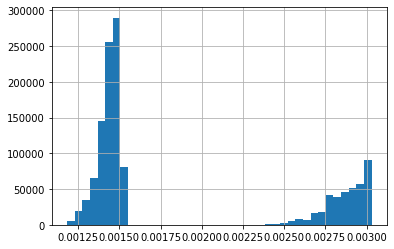

In [61]:
#Loan Maturity Risk
# transformed_data['mat_risk'] =
temp/transformed_data['fico_range_low'].hist(bins=40)

#Payment History Score

payment_history_score = (pct_tl_nvr_dlq / 100) - (num_accts_ever_120_pd / total_acc) + (num_bc_sats / total_acc)

In [158]:
transformed_data['payment_history'] = ((transformed_data['pct_tl_nvr_dlq']/100) - (transformed_data['num_accts_ever_120_pd']/transformed_data['total_acc']) - (transformed_data['num_bc_sats']/transformed_data['total_acc']))

# Collateral Coverage Ratio

In [113]:
# transformed_data['total_il_high_credit_limit'].max()
# transfromed_data = transformed_data.drop(transformed_data[transformed_data['total_il_high_credit_limit']==2118996.0].index)
# len(transformed_data.drop(transformed_data[transformed_data['total_il_high_credit_limit']==2118996.0].index)['total_il_high_credit_limit'] / transformed_data.drop(transformed_data[transformed_data['total_il_high_credit_limit']==2118996.0].index)['loan_amnt'])

In [159]:
transformed_data['collateral_coverage_ratio'] = transformed_data['total_il_high_credit_limit']/transformed_data['loan_amnt']

In [160]:
transformed_data

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,home_ownership,annual_inc,purpose,title,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,Default,coborrower_inc,bank_dlq,il_acc,payment_history,collateral_coverage_ratio
0,68355089,24700.0,24700.0,24700.0,36 months,820.28,MORTGAGE,65000.0,small_business,Business,...,314017.0,39475.0,79300.0,24667.0,0,0.0,0,1,0.631895,0.998664
2,67275481,20000.0,20000.0,20000.0,36 months,631.26,MORTGAGE,85000.0,major_purchase,Major purchase,...,193390.0,27937.0,14500.0,36144.0,0,0.0,0,1,0.666333,1.807200
3,68616873,8000.0,8000.0,8000.0,36 months,263.74,MORTGAGE,42000.0,credit_card,Credit card refinancing,...,256513.0,113782.0,17000.0,135513.0,0,0.0,0,1,0.721778,16.939125
4,68356421,22400.0,22400.0,22400.0,60 months,508.30,MORTGAGE,95000.0,debt_consolidation,Debt consolidation,...,436841.0,184356.0,21000.0,191682.0,0,0.0,0,1,0.798571,8.557232
6,66624733,18000.0,18000.0,18000.0,60 months,471.70,RENT,150000.0,debt_consolidation,Debt consolidation,...,65819.0,36247.0,10300.0,31319.0,1,0.0,0,1,0.740741,1.739944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280639,88948836,29400.0,29400.0,29400.0,60 months,683.94,MORTGAGE,180792.0,debt_consolidation,Debt consolidation,...,719056.0,148305.0,56500.0,95702.0,0,0.0,0,1,0.781250,3.255170
1280640,89996426,32000.0,32000.0,32000.0,60 months,752.74,MORTGAGE,157000.0,home_improvement,Home improvement,...,524379.0,122872.0,15800.0,23879.0,1,0.0,0,1,0.611111,0.746219
1280641,89955820,24000.0,24000.0,24000.0,60 months,515.74,OWN,125000.0,credit_card,Credit card refinancing,...,128902.0,31320.0,93700.0,28602.0,0,0.0,0,1,0.500000,1.191750
1280643,88977788,24000.0,24000.0,24000.0,60 months,515.74,MORTGAGE,108000.0,debt_consolidation,Debt consolidation,...,227883.0,140118.0,27900.0,172283.0,0,0.0,1,1,0.431414,7.178458


In [ ]:
transformed_data.to_csv("transformed_data.csv")